<IPython.core.display.Javascript object>


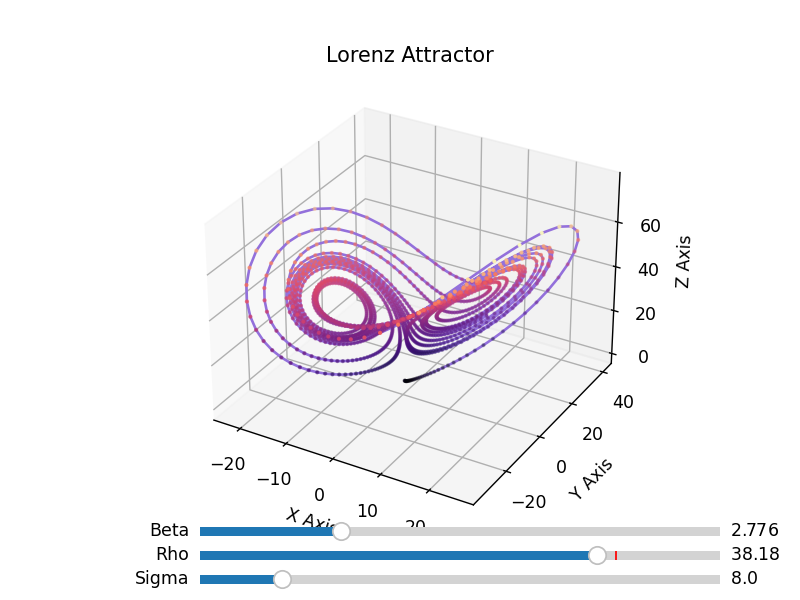

In [15]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Slider

def lorenz(x, y, z, sigma=10, rho=28, beta=2.667):
    deriv_x = sigma*(y - x)
    deriv_y = rho*x - y - x*z
    deriv_z = x*y - beta*z
    return deriv_x, deriv_y, deriv_z

dt = 0.01
nb_pas = 1500
x = np.empty(nb_pas + 1)
y = np.empty(nb_pas + 1)
z = np.empty(nb_pas + 1)

x[0], y[0], z[0] = (1.0, 3.0, 5)
for i in range(nb_pas):
    deriv_x, deriv_y, deriv_z = lorenz(x[i], y[i], z[i])
    x[i + 1] = x[i] + (deriv_x * dt)
    y[i + 1] = y[i] + (deriv_y * dt)
    z[i + 1] = z[i] + (deriv_z * dt)

# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, s=2, c=plt.cm.magma(z / max(z)))
ax.plot(x, y, z, color='mediumpurple')
ax.set_xlabel("Axes des X")
ax.set_ylabel("Axes des Y")
ax.set_zlabel("Axes des Z")
ax.set_title("Effet papillon")

# slider
axcolor = 'goldenrod'
ax_sigma = plt.axes([0.25, 0.02, 0.65, 0.03], facecolor=axcolor)
ax_rho = plt.axes([0.25, 0.06, 0.65, 0.03], facecolor=axcolor)
ax_beta = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)

sigma=8
rho=40
beta=2.667

s_sigma = Slider(ax_sigma, 'Sigma', 0.1, 50.0, valinit=sigma)
s_rho = Slider(ax_rho, 'Rho', 0.1, 50.0, valinit=rho)
s_beta = Slider(ax_beta, 'Beta', 0.1, 10.0, valinit=beta)

num_steps = nb_pas
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)
xs[0], ys[0], zs[0] = (0., 1., 1.05)

def update(val):
    sigma = s_sigma.val
    rho = s_rho.val
    beta = s_beta.val

    for i in range(num_steps):
        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i], sigma, rho, beta)
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
    
    ax.clear()
    ax.scatter(xs, ys, zs, s=2, c=plt.cm.magma(zs / max(zs)))
    ax.plot(xs, ys, zs, color='mediumpurple')
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.set_title("Lorenz Attractor")
    fig.canvas.draw_idle()

s_sigma.on_changed(update)
s_rho.on_changed(update)
s_beta.on_changed(update)

plt.show()
